In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import copy
from networkFunctions import *
from plotFunctions import *

In [2]:
#Network parameters
msgUtility = 10
costFactor = 0.1
numNodes = 20
numMsg = 200
myseed = 32
maxEpochs = 10000
msgCost = costFactor*msgUtility

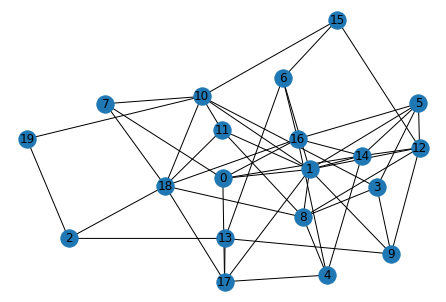

In [3]:
G = nx.erdos_renyi_graph(numNodes, 0.2, seed=myseed)
myPos = nx.spring_layout(G, seed = 40)
nx.draw(G, pos=myPos, with_labels=True)

In [4]:
prevStates = []
maxEpochs = 1
commonAttrs = {"burnoutThreshold":2*(numMsg*costFactor*msgUtility)/numNodes,"burnoutDrop":2}

attr = "burnoutThreshold"
attrRange = np.arange(5*msgCost, 50*msgCost, 5)
# attrRange = ["Virtue","Utilitarian","Deontology"]
outcomeNetwork = {}
type = "Deontology"

for val in attrRange:
    if attr == "type":
        type = val
    else:
        commonAttrs[attr] = val
    initGraph(G, numNodes, commonAttrs, type = type)
    e = 0
    while e<maxEpochs:
        e+=1
        msgList = createMsgs(numMsg, numNodes, G)  #Message list creation
        prevStates = [copy.deepcopy(G.nodes[i]['agent']) for i in range(numNodes)]
        nf, nd = transmitMsgs(msgList, G)
        curStable = [G.nodes[i]['agent'].isStable(prevStates[i]) for i in range(numNodes)]
        if np.count_nonzero(curStable) == numNodes:
            break
    outcomeNetwork[val] = copy.deepcopy(G)

[480, 760, 920, 1020, 1120, 600, 1180, 1180, 820]


/Users/janvichhabra/Documents/acad/Comparative-Ethics/plotFunctions.py:83: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(range(len(outcomeNetwork)),list(outcomeNetwork.keys()))


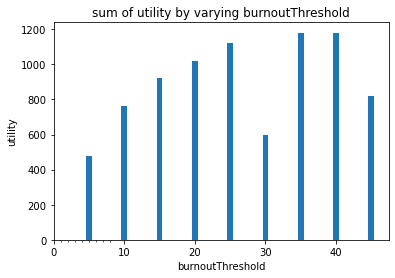

In [5]:
utility_list = plotNetworkVaryParams(outcomeNetwork, 'utility', attr, plotType="bar")
print(utility_list)

[324.0, 338.0, 346.0, 351.0, 356.0, 330.0, 359.0, 359.0, 341.0]


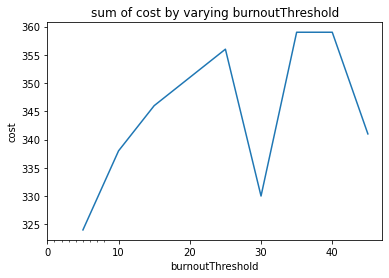

In [6]:
costList = plotNetworkVaryParams(outcomeNetwork, 'cost', attr, plotType="line")
print(costList)

[47, 23, 10, 4, 2, 0, 0, 0, 0]


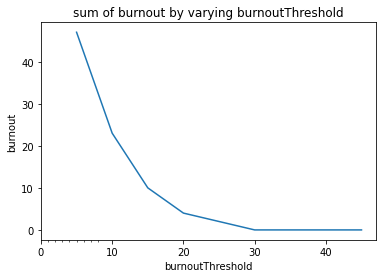

In [7]:
burnoutList = plotNetworkVaryParams(outcomeNetwork, 'burnout', attr, plotType="line")
print(burnoutList)

[124, 138, 146, 151, 156, 130, 159, 159, 141]


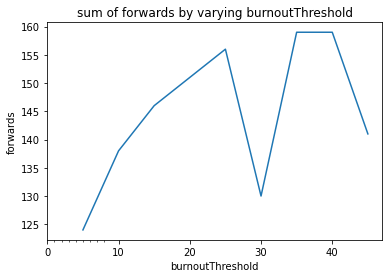

In [8]:
forwardsList = plotNetworkVaryParams(outcomeNetwork, 'forwards', attr, plotType="line")
print(forwardsList)

[76, 62, 54, 49, 44, 70, 41, 41, 59]


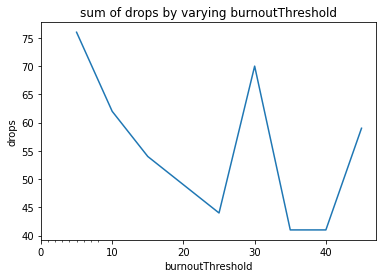

In [9]:
dropsList = plotNetworkVaryParams(outcomeNetwork, 'drops', attr, plotType="line")
print(dropsList)

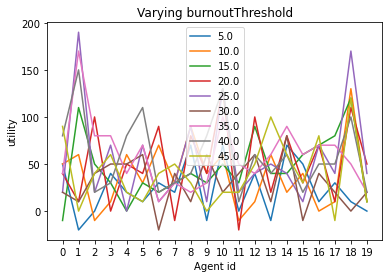

In [10]:
plotAgentWiseVaryParams(outcomeNetwork, "utility", attr, plotType="line")

/Users/janvichhabra/Documents/acad/Comparative-Ethics/plotFunctions.py:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(range(numNodes), propertyValues, color,markerfmt=color+'o', basefmt=" ", label=label)


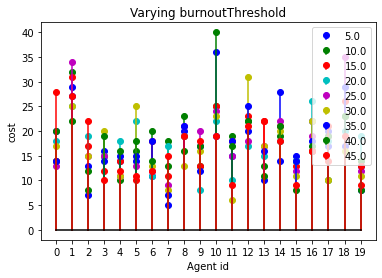

In [11]:
plotAgentWiseVaryParams(outcomeNetwork, "cost", attr, plotType="stem")

/Users/janvichhabra/Documents/acad/Comparative-Ethics/plotFunctions.py:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(range(numNodes), propertyValues, color,markerfmt=color+'o', basefmt=" ", label=label)


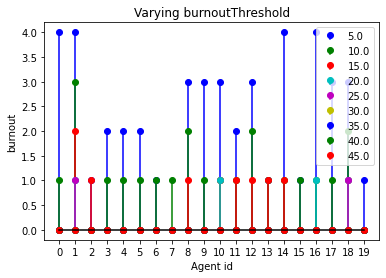

In [12]:
plotAgentWiseVaryParams(outcomeNetwork, "burnout", attr, plotType="stem")

/Users/janvichhabra/Documents/acad/Comparative-Ethics/plotFunctions.py:83: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(range(len(outcomeNetwork)),list(outcomeNetwork.keys()))


[480, 760, 920, 1020, 1120, 600, 1180, 1180, 820]

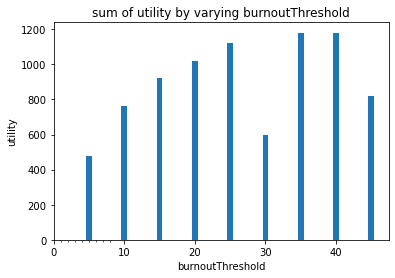

In [13]:
plotNetworkVaryParams(outcomeNetwork, 'utility', attr, plotType="bar")

[324.0, 338.0, 346.0, 351.0, 356.0, 330.0, 359.0, 359.0, 341.0]

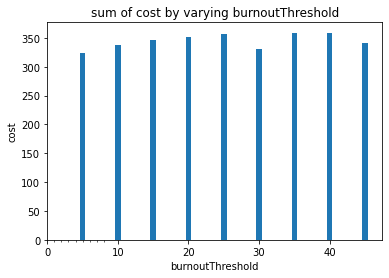

In [14]:
plotNetworkVaryParams(outcomeNetwork, 'cost', attr, plotType="bar")

[47, 23, 10, 4, 2, 0, 0, 0, 0]

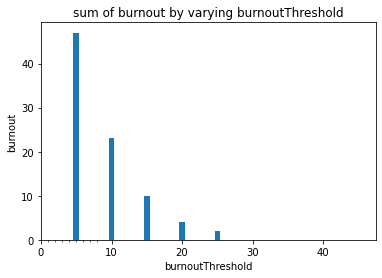

In [15]:
plotNetworkVaryParams(outcomeNetwork, 'burnout', attr, plotType="bar")

[124, 138, 146, 151, 156, 130, 159, 159, 141]

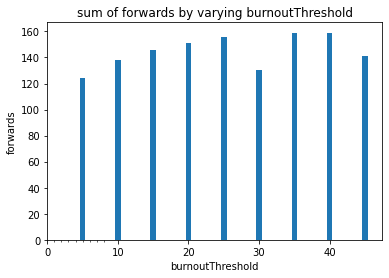

In [16]:
plotNetworkVaryParams(outcomeNetwork, 'forwards', attr, plotType="bar")

[76, 62, 54, 49, 44, 70, 41, 41, 59]

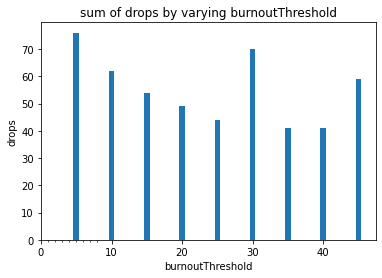

In [17]:
plotNetworkVaryParams(outcomeNetwork, 'drops', attr, plotType="bar")

In [18]:
print(G.nodes[0]['agent'].burnoutCount)
print(G.nodes[0]['agent'].burnoutThreshold)

0
45.0


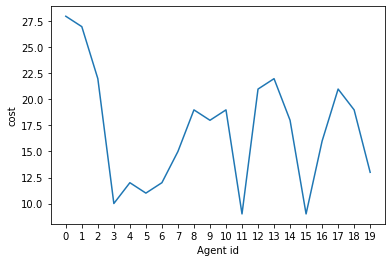

In [19]:
plotAgentwiseProp(G, "cost")

In [20]:
plotAgentwiseProp(G, "virtuePoints", plotMean=True)

Not applicable property


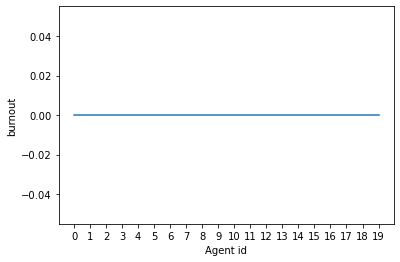

In [21]:
plotAgentwiseProp(G, "burnout")

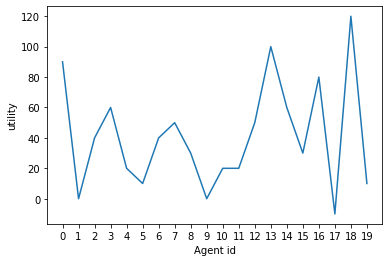

In [22]:
plotAgentwiseProp(G, "utility")